In [1]:
import tensorflow as tf
import os
from utils import (get_test_dataset, plot_overview, plot_batch_pred_vs_real, plot_grad_cam, pred_ds, 
                   filter_imgs, calculate_video_pred, calculate_video_accuracy, mismatch_videos)
import numpy as np
import re
import pandas as pd

Hyperparameter Optimierung Visualisierung

In [ ]:
%tensorboard --logdir tb_logs

Auswertung der einzelnen Modelle

In [2]:
my_en = tf.keras.models.load_model(os.path.join("saved_models", "my_en"))
my_xc = tf.keras.models.load_model(os.path.join("models", "best_xc.h5"))
my_vgg = tf.keras.models.load_model(os.path.join("models", "best_vgg.h5"))

In [5]:
my_en.summary()

Model: "EfficientNetV2-S"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 efficientnetv2-s (Functiona  (None, 7, 7, 1280)       20331360  
 l)                                                              
                                                                 
 conv2d (Conv2D)             (None, 7, 7, 500)         640500    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 500)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 3, 3, 500)    

Loading Test data

In [3]:
#indices for ds
df_ds, celeb_ds, dfdc_ds, ff_ds = 0, 1, 2, 3
dataset_names = ['DeeperForensics', 'Celeb-DF', 'DFDC', 'FF']

In [4]:
dataset_test_224 = get_test_dataset(img_size=224, batch_size=32, shuffle=False)
dataset_test_229 = get_test_dataset(img_size=229, batch_size=32, shuffle=False)

Found 8210 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 727 files belonging to 2 classes.
Found 945 files belonging to 2 classes.
Found 8210 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 727 files belonging to 2 classes.
Found 945 files belonging to 2 classes.


In [5]:
dataset_test_224_s = get_test_dataset(img_size=224, batch_size=32, shuffle=True)
dataset_test_229_s = get_test_dataset(img_size=229, batch_size=32, shuffle=True)

Found 8210 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 727 files belonging to 2 classes.
Found 945 files belonging to 2 classes.
Found 8210 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 727 files belonging to 2 classes.
Found 945 files belonging to 2 classes.


Xception

Quick overview

In [6]:
# Loss und Accuracy für jeden Testdatensatz berechnen und speichern
loss_values = []
accuracy_values = []

for test_dataset in dataset_test_229:
    loss, accuracy = my_xc.evaluate(test_dataset)
    loss_values.append(loss)
    accuracy_values.append(round(accuracy*100, 2))

30/30 [==============================] - 42s 1s/step - loss: 2.0372 - accuracy: 0.5206


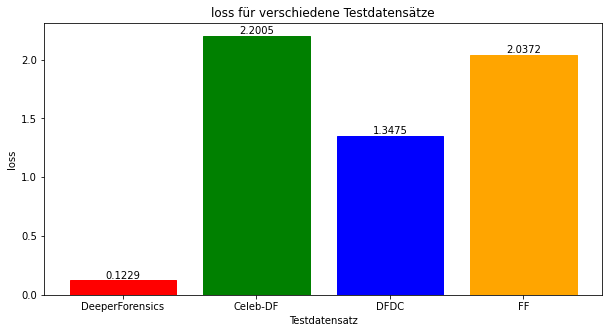

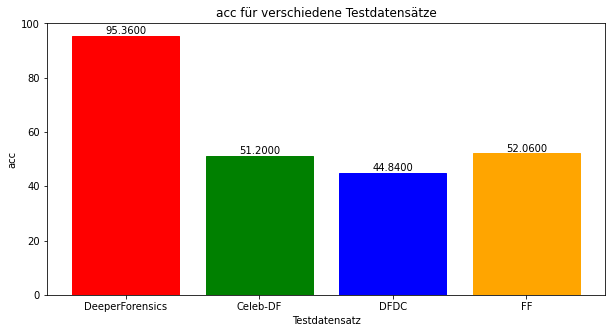

In [7]:
plot_overview(dataset_test_229, loss_values, dataset_names, "loss") # loss
plot_overview(dataset_test_229, accuracy_values, dataset_names, "acc") #acc

Actual vs Pred

Predictions:
 [0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0]
Labels:
 [0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 1. 0.]
Predictions:
 [1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
Labels:
 [1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 0. 1. 1. 1. 0.]
Predictions:
 [1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1]
Labels:
 [0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 0. 1. 1. 0. 1. 0.]
Predictions:
 [1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1]
Labels:
 [0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1.
 1. 0. 0. 1. 0. 0. 1. 0.]


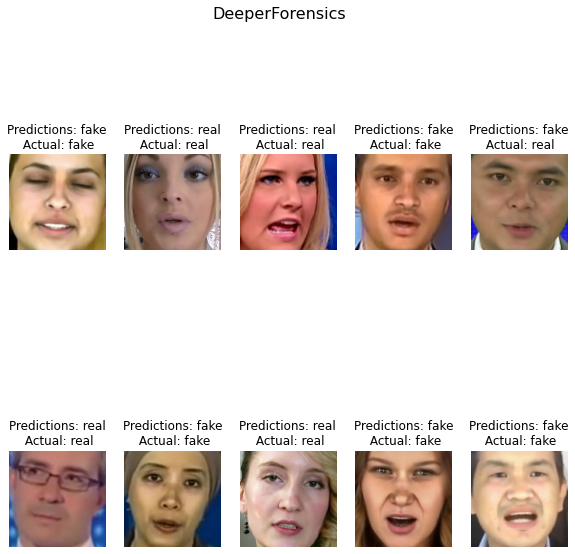

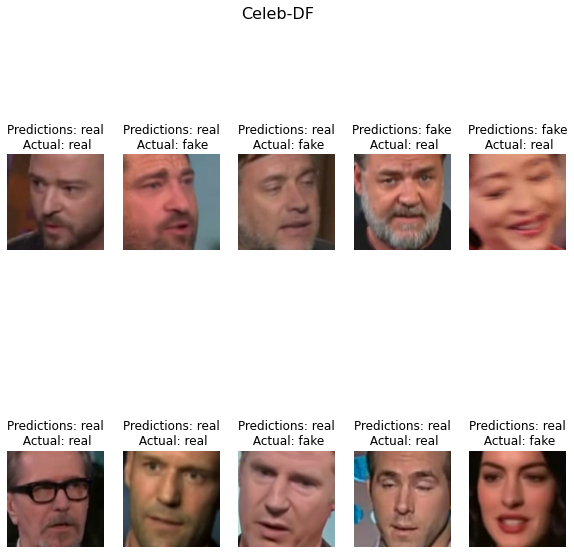

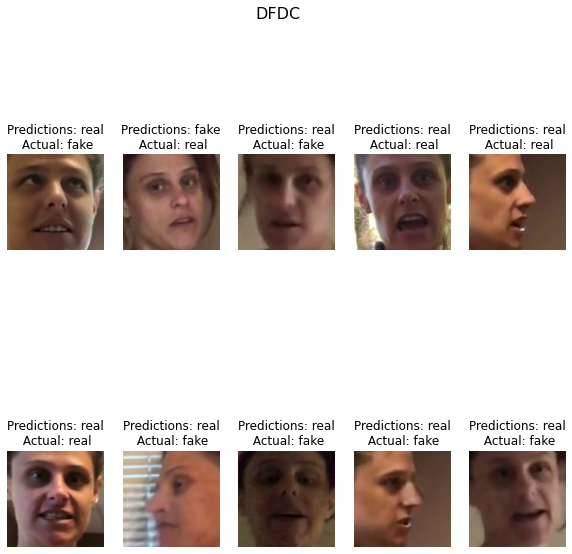

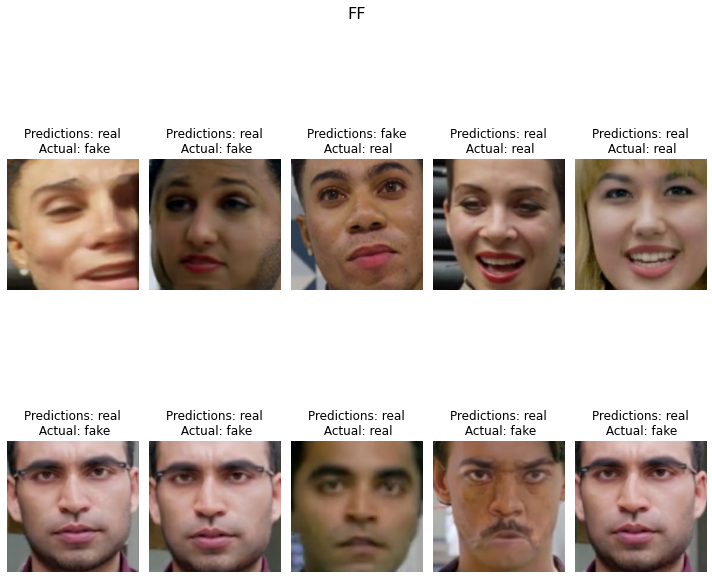

In [6]:
plot_batch_pred_vs_real(dataset_test_229_s, dataset_names ,my_xc)

Grad-CAM

In [7]:
img_label_0, img_label_1 = filter_imgs(dataset_test_229_s[df_ds])

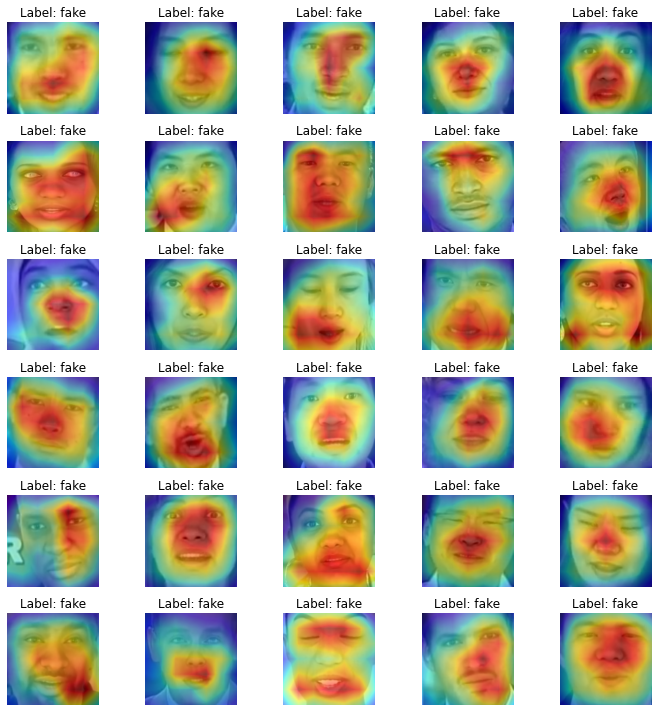

In [8]:
# fake
plot_grad_cam(my_xc, "fake", img_label_0)

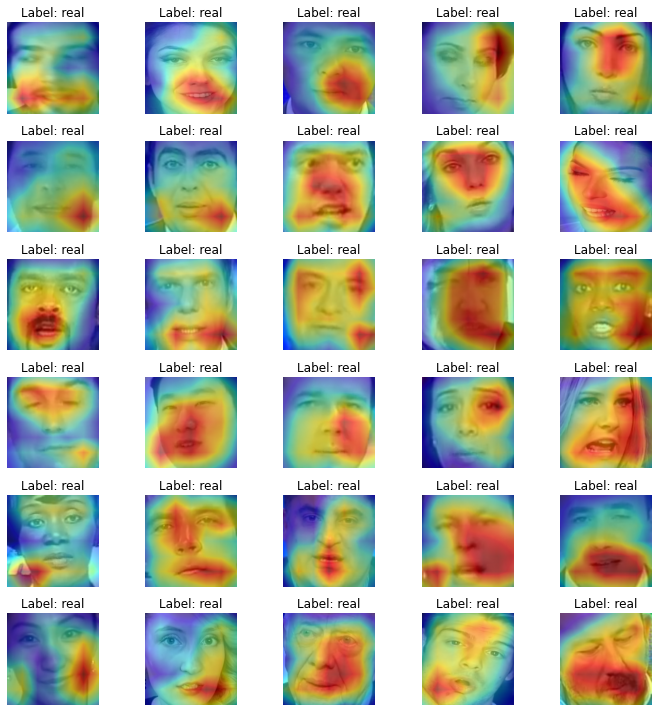

In [9]:
# real
plot_grad_cam(my_xc, "real", img_label_1)

Video Prediction

In [6]:
#df
labels, predictions, video_names = pred_ds(dataset_test_229[df_ds], my_xc)

In [7]:
df = calculate_video_pred(video_names, labels, predictions, .4)
calculate_video_accuracy(df)

98.25436408977556

In [10]:
# celeb
labels, predictions, video_names = pred_ds(dataset_test_229[celeb_ds], my_xc)

In [15]:
df = calculate_video_pred(video_names, labels, predictions, .2)
calculate_video_accuracy(df)

56.00000000000001

In [16]:
# ff
labels, predictions, video_names = pred_ds(dataset_test_229[ff_ds], my_xc)

In [24]:
df = calculate_video_pred(video_names, labels, predictions, .5)
calculate_video_accuracy(df)

57.99999999999999

In [27]:
# dfdc
labels, predictions, video_names = pred_ds(dataset_test_229[dfdc_ds], my_xc)

In [39]:
df = calculate_video_pred(video_names, labels, predictions, 1)
calculate_video_accuracy(df)

50.0

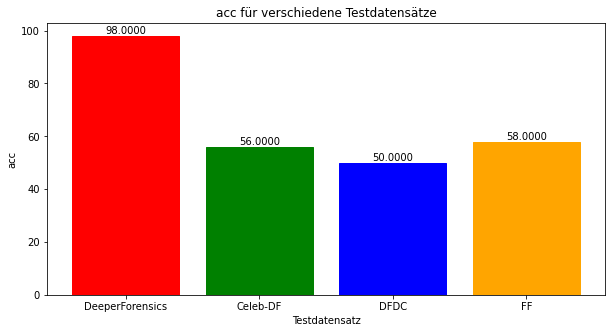

In [6]:
acc_values = [98, 56, 50, 58]
plot_overview(dataset_test_229, acc_values, dataset_names, "acc") # loss

VGG 16

Quick Overview

In [7]:
# Loss und Accuracy für jeden Testdatensatz berechnen und speichern
loss_values = []
accuracy_values = []

for test_dataset in dataset_test_224:
    loss, accuracy = my_vgg.evaluate(test_dataset)
    loss_values.append(loss)
    accuracy_values.append(accuracy)

30/30 [==============================] - 64s 2s/step - loss: 2.1061 - accuracy: 0.5079


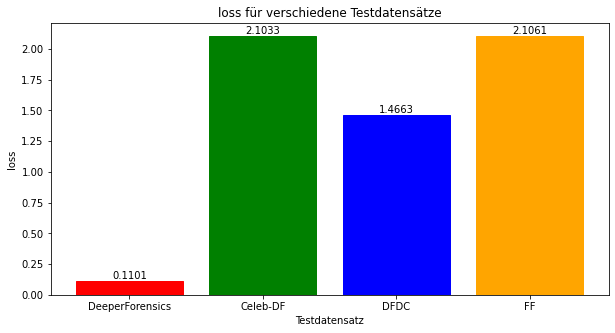

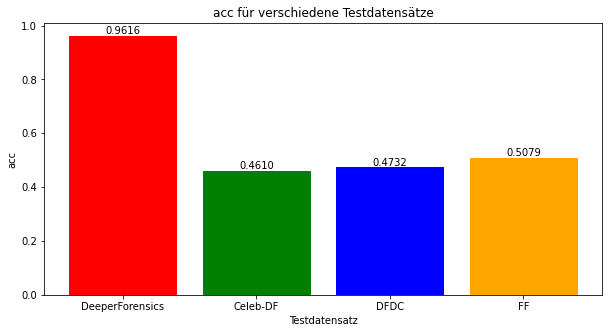

In [8]:
plot_overview(dataset_test_224, loss_values, dataset_names, "loss") # loss
plot_overview(dataset_test_224, accuracy_values, dataset_names, "acc") #acc

Actual vs Predict

Predictions:
 [1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1]
Labels:
 [1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 1.]
Predictions:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
Labels:
 [0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1.
 1. 0. 0. 1. 0. 0. 1. 1.]
Predictions:
 [1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1]
Labels:
 [0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 1. 1.]
Predictions:
 [1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1]
Labels:
 [1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 1.]


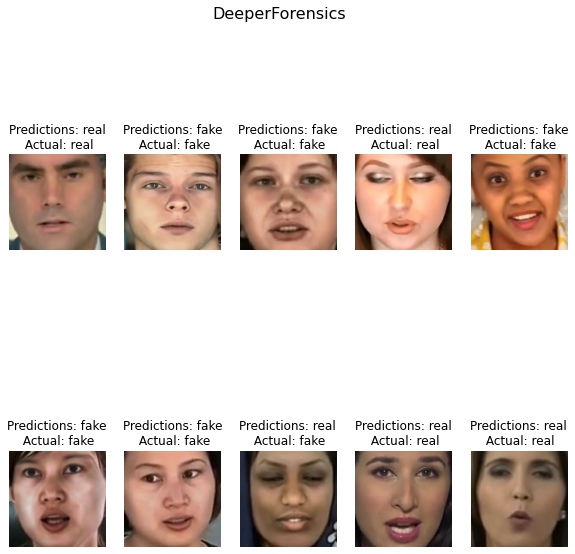

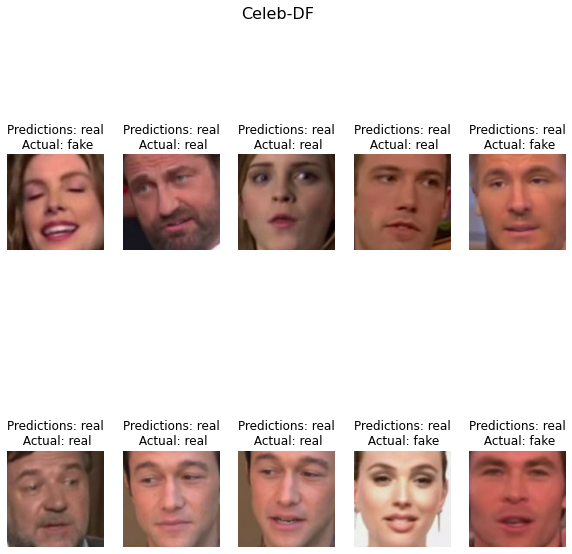

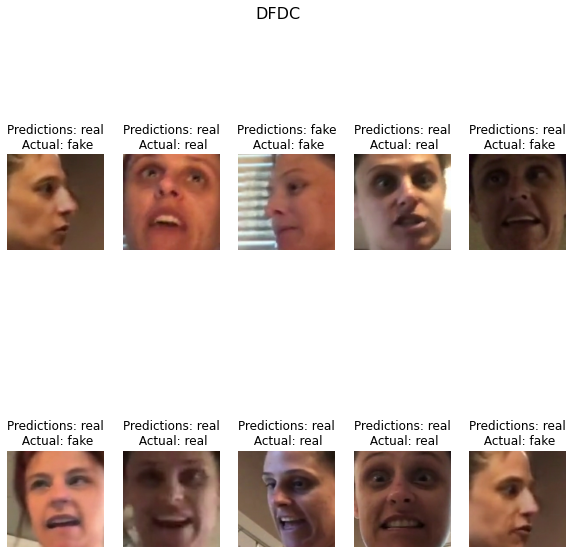

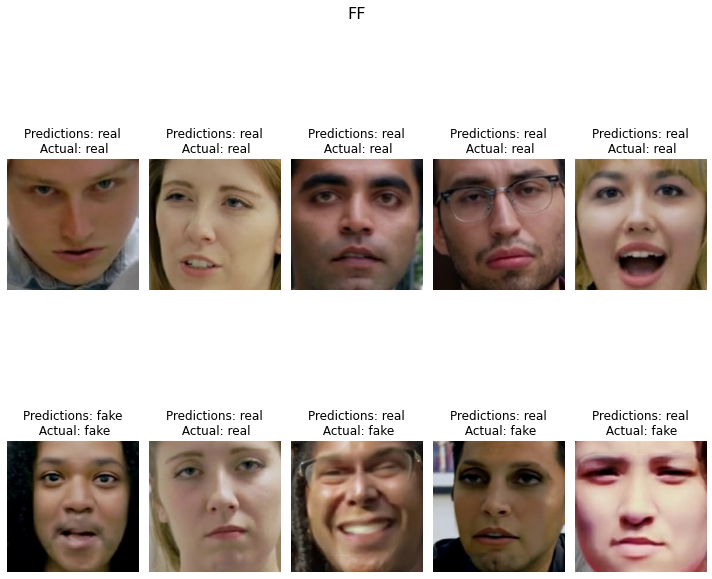

In [9]:
plot_batch_pred_vs_real(dataset_test_224_s, dataset_names ,my_vgg)

Grad-CAM

In [10]:
img_label_0, img_label_1 = filter_imgs(dataset_test_224_s[df_ds])

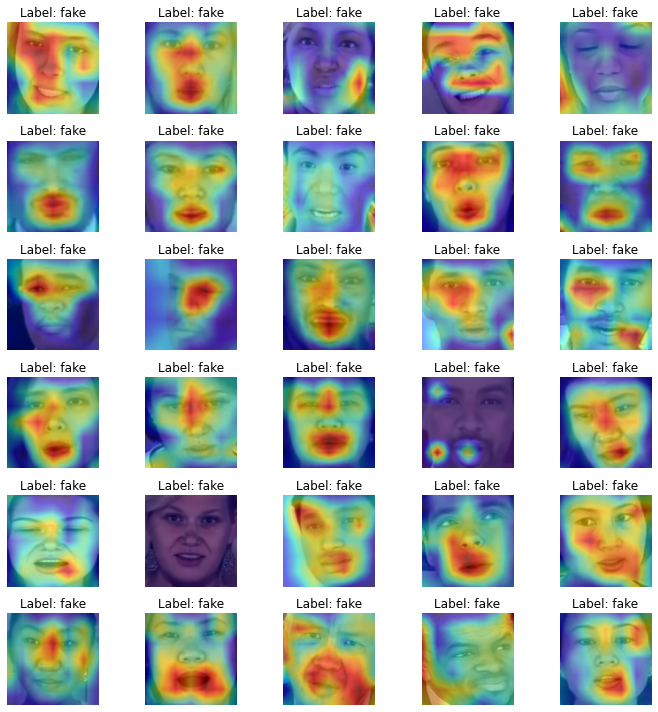

In [11]:
# fake
plot_grad_cam(my_vgg, "fake", img_label_0)

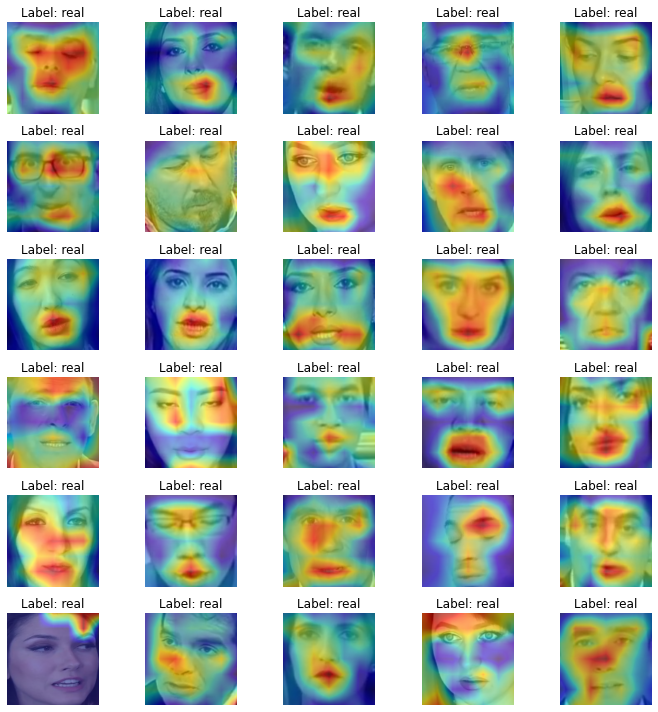

In [12]:
# real
plot_grad_cam(my_vgg, "real", img_label_1)

Video Prediction

In [13]:
#df
labels, predictions, video_names = pred_ds(dataset_test_224[df_ds], my_vgg)

In [21]:
df = calculate_video_pred(video_names, labels, predictions, .5)
calculate_video_accuracy(df)

97.75561097256858

In [22]:
# celeb
labels, predictions, video_names = pred_ds(dataset_test_224[celeb_ds], my_vgg)

In [27]:
df = calculate_video_pred(video_names, labels, predictions, .8)
calculate_video_accuracy(df)

50.0

In [29]:
# ff
labels, predictions, video_names = pred_ds(dataset_test_224[ff_ds], my_vgg)

In [36]:
df = calculate_video_pred(video_names, labels, predictions, .5)
calculate_video_accuracy(df)

54.0

In [37]:
# dfdc
labels, predictions, video_names = pred_ds(dataset_test_224[dfdc_ds], my_vgg)

In [42]:
df = calculate_video_pred(video_names, labels, predictions, 1)
calculate_video_accuracy(df)

50.0

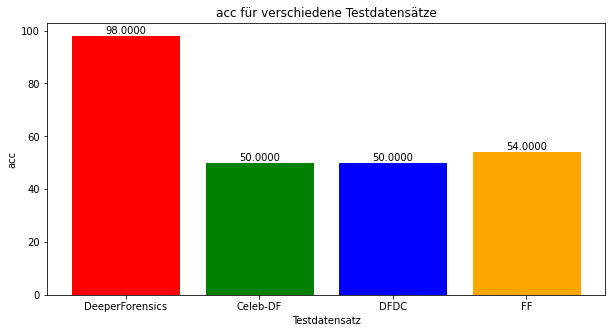

In [44]:
acc_values = [98, 50, 50, 54]
plot_overview(dataset_test_229, acc_values, dataset_names, "acc") # loss

EfficientNetV2

Quick Overview

In [45]:
# Loss und Accuracy für jeden Testdatensatz berechnen und speichern
loss_values = []
accuracy_values = []

for test_dataset in dataset_test_224:
    loss, accuracy = my_en.evaluate(test_dataset)
    loss_values.append(loss)
    accuracy_values.append(accuracy)

30/30 [==============================] - 49s 2s/step - loss: 4.6674 - accuracy: 0.4878


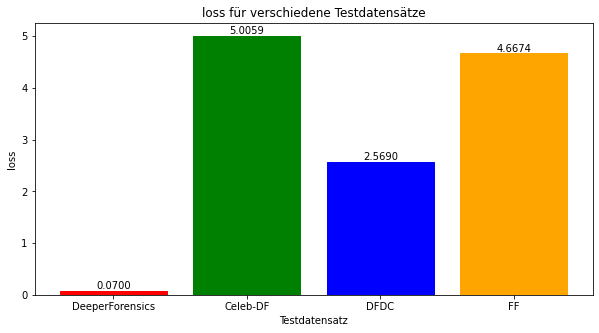

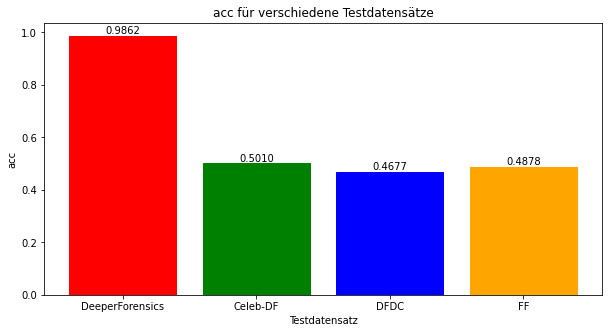

In [46]:
plot_overview(dataset_test_224, loss_values, dataset_names, "loss") # loss
plot_overview(dataset_test_224, accuracy_values, dataset_names, "acc") #acc

Actual vs Predict

Predictions:
 [1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1]
Labels:
 [1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 1.]
Predictions:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Labels:
 [0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0.
 1. 0. 0. 0. 0. 1. 0. 0.]
Predictions:
 [1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1]
Labels:
 [1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 1. 1. 1. 1. 0. 1. 0. 0.]
Predictions:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Labels:
 [0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 0.]


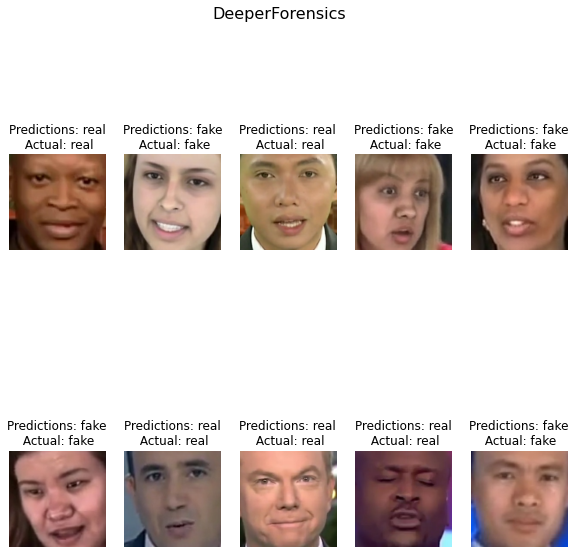

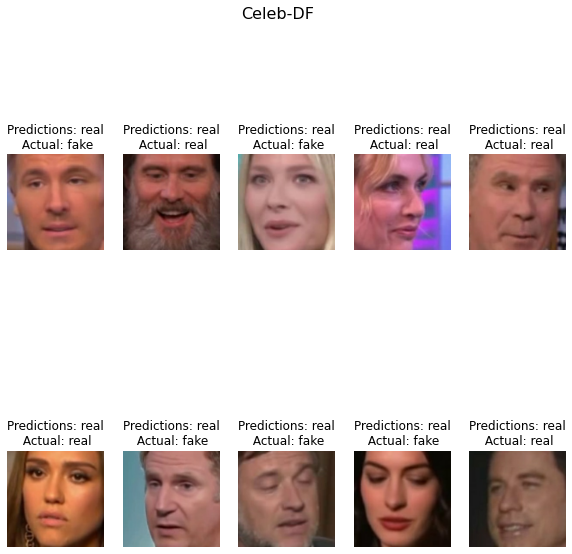

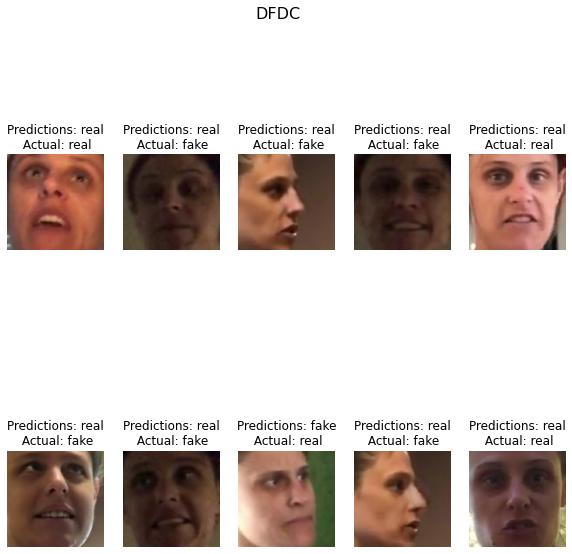

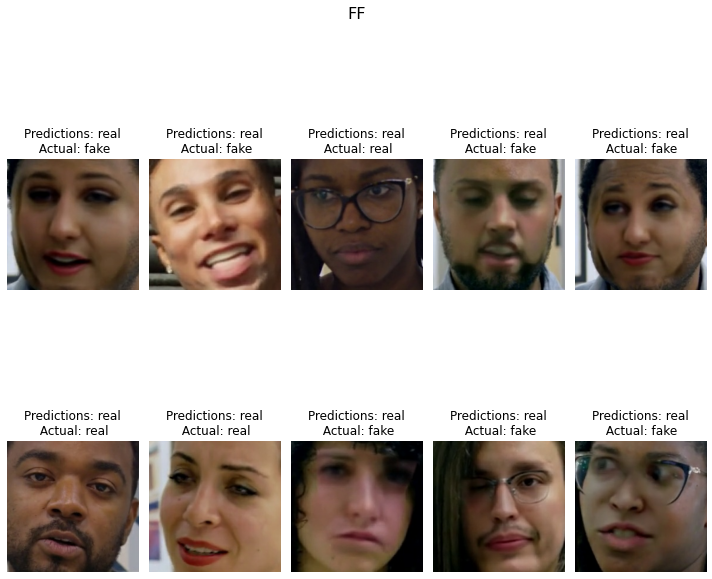

In [48]:
plot_batch_pred_vs_real(dataset_test_224_s, dataset_names ,my_en)

Grad-CAM

In [51]:
img_label_0, img_label_1 = filter_imgs(dataset_test_224_s[df_ds])

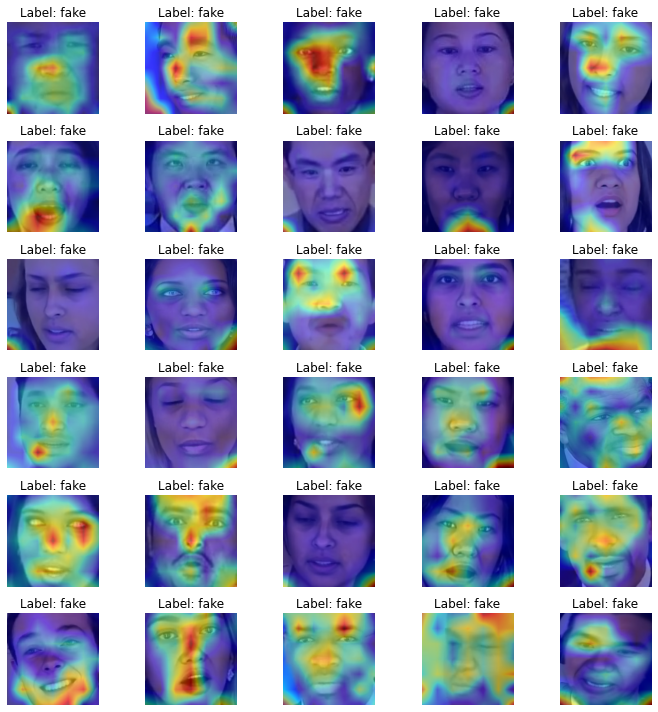

In [52]:
# fake
plot_grad_cam(my_en, "fake", img_label_0)

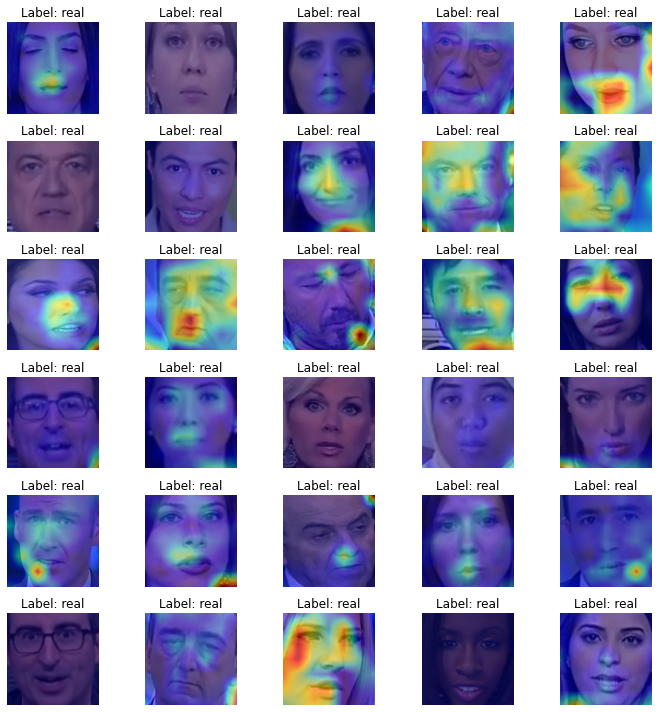

In [53]:
# real
plot_grad_cam(my_en, "real", img_label_1)

Video Prediction

In [54]:
#df
labels, predictions, video_names = pred_ds(dataset_test_224[df_ds], my_en)

In [65]:
df = calculate_video_pred(video_names, labels, predictions, .3)
calculate_video_accuracy(df)

99.25187032418953

In [66]:
# celeb
labels, predictions, video_names = pred_ds(dataset_test_224[celeb_ds], my_en)

In [72]:
df = calculate_video_pred(video_names, labels, predictions, .5)
calculate_video_accuracy(df)

50.0

In [73]:
# ff
labels, predictions, video_names = pred_ds(dataset_test_224[ff_ds], my_en)

In [78]:
df = calculate_video_pred(video_names, labels, predictions, .2)
calculate_video_accuracy(df)

52.0

In [79]:
# dfdc
labels, predictions, video_names = pred_ds(dataset_test_224[dfdc_ds], my_en)

In [84]:
df = calculate_video_pred(video_names, labels, predictions, 1)
calculate_video_accuracy(df)

50.0

In [85]:
dataset_names

['DeeperForensics', 'Celeb-DF', 'DFDC', 'FF']

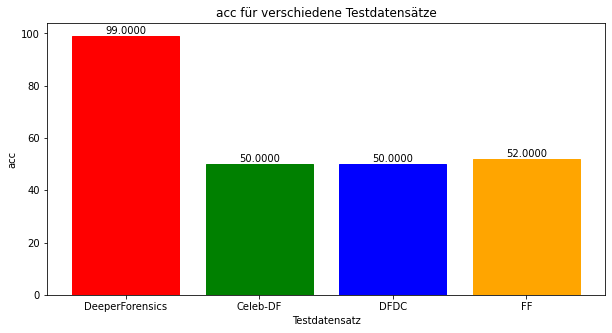

In [86]:
acc_values = [99, 50, 50, 52]
plot_overview(dataset_test_229, acc_values, dataset_names, "acc") # loss